<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning-Notes/blob/main/Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizers

- Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. They play a crucial role in training a neural network by minimizing the loss function and improving the model’s accuracy.

- The main goal of an optimizer is to find the minimum of a loss function. This helps in updating weights such that the error is reduced during training.

---

## Types of Optimizers

### 1. **Gradient Descent (GD)**
- Updates weights based on the full dataset.
- Computationally expensive for large datasets.
- Update rule:
  \[
  \theta = \theta - \eta \nabla_\theta J(\theta)
  \]

### 2. **Stochastic Gradient Descent (SGD)**
- Updates weights using only one training sample at a time.
- Introduces noise but faster updates.
- Good for large datasets.

### 3. **Mini-Batch Gradient Descent**
- Compromise between GD and SGD.
- Uses small batches (e.g., 32, 64) to update weights.
- Faster convergence and stable learning.

---

## Advanced Optimizers

### 4. **Momentum**
- Accelerates SGD in relevant direction and dampens oscillations.
- Update rule:
  \[
  v_t = \gamma v_{t-1} + \eta \nabla_\theta J(\theta)
  \]
  \[
  \theta = \theta - v_t
  \]

### 5. **Nesterov Accelerated Gradient (NAG)**
- Improves Momentum by anticipating future position.
- Looks ahead before the gradient is calculated.

### 6. **Adagrad**
- Adapts learning rate for each parameter.
- Good for sparse data.
- Accumulates squared gradients in denominator.

### 7. **RMSprop**
- Modifies Adagrad by using exponential moving average of squared gradients.
- Prevents aggressive, monotonically decreasing learning rate.
- Good for non-stationary objectives.

### 8. **Adam (Adaptive Moment Estimation)**
- Combines Momentum and RMSprop.
- Maintains both the moving average of the gradient (first moment) and squared gradient (second moment).
- Most popular and widely used optimizer.
- Update rule involves:
  \[
  m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla_\theta J(\theta)
  \]
  \[
  v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla_\theta J(\theta))^2
  \]
  \[
  \theta = \theta - \eta \frac{m_t}{\sqrt{v_t} + \epsilon}
  \]

### 9. **AdamW**
- Variant of Adam with weight decay for better generalization.

---

## Choosing the Right Optimizer
- **SGD with Momentum**: Good when learning rate scheduling is used.
- **Adam**: Works well in most deep learning models (default choice).
- **RMSprop**: Good for RNNs and sequence data.
- **Adagrad**: Effective for sparse data (e.g., NLP).

---

## Summary Table

| Optimizer | Adaptive LR | Momentum | Best Use Case |
|----------|--------------|----------|----------------|
| SGD | No | Optional | Small datasets |
| Momentum | No | Yes | Faster convergence |
| NAG | No | Yes (lookahead) | Faster + smarter |
| Adagrad | Yes | No | Sparse data |
| RMSprop | Yes | No | RNNs |
| Adam | Yes | Yes | General use |
| AdamW | Yes | Yes + WD | Regularization |



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

In [2]:
X, y = make_moons(n_samples=2000, noise=0.3, random_state=42)

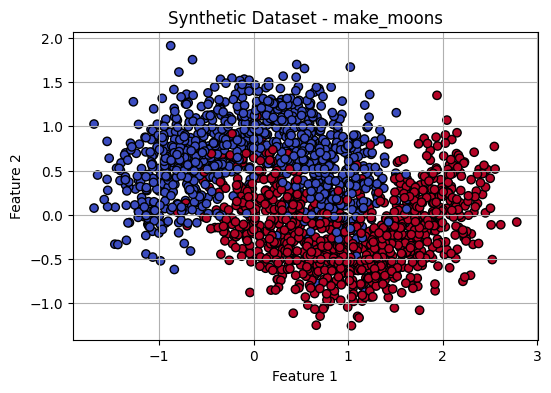

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Synthetic Dataset - make_moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
def build_model(optimizer):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(2,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [7]:
optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Adam': Adam(learning_rate=0.01),
    'RMSprop': RMSprop(learning_rate=0.01),
    'Adagrad': Adagrad(learning_rate=0.01)
}

In [8]:
histories = {}

In [9]:
for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer")
    model = build_model(opt)
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_test_scaled, y_test),
        epochs=50,
        batch_size=32,
        verbose=0
    )
    histories[name] = history


Training with SGD optimizer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with Adam optimizer

Training with RMSprop optimizer

Training with Adagrad optimizer


In [10]:
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

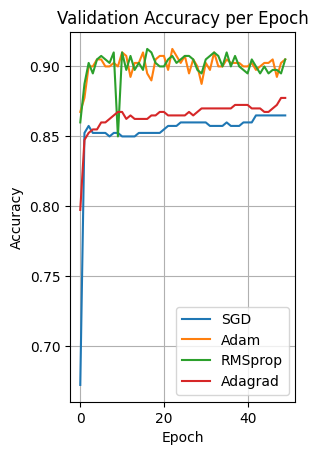

In [11]:
# Accuracy plot
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

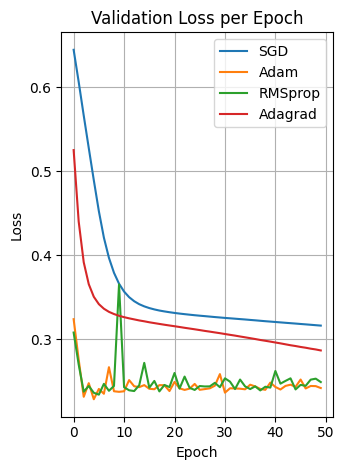

In [12]:
# Loss plot
plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()